In [ ]:
# Company Profit Forecasting

This notebook aims to forecast company profit using time series analysis and the Auto-ARIMA model. It involves the following steps:

1. Data Loading and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Time Series Forecasting with Auto-ARIMA
4. Model Evaluation and Analysis

**Data Loading and Preprocessing**

import necessary libraries like pandas, numpy, matplotlib, seaborn, and statsmodels.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime

# Display settings
pd.options.display.float_format = '{:.2f}'.format

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Auto ARIMA for automated model selection
from pmdarima import auto_arima
import pmdarima as pm

# Display settings
pd.options.display.float_format = '{:.2f}'.format

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
## Data Loading and Preprocessing

In this section, we load the dataset, perform necessary data cleaning, and prepare it for time series analysis.

In [ ]:
# Load the merged dataset pre-processed from Milestone1
data = pd.read_csv("merged_df.csv")
data.head()
data.head(10)

,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Average_Spending,Profit_Margin,Transaction_Year,Transaction_Month,Transaction_Day,Total_Transactions,Total_Spending,Avg_Purchase_Frequency,Purchase_Likelihood
0,1.00,88.00,6.00,0.00,2024-03-26,194379.15,1075200.00,Elite Consulting 88,75950.00,"EDSA, Barangay 456, Taguig, Philippines",RevenueVue Dashboard,1075200.00,0.07,2024,3,26,93,143526705.53,77,0
1,2.00,29.00,19.00,16.00,2021-07-12,97930.99,1428000.00,Sky Industries 29,61952.00,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,89250.00,0.04,2021,7,12,81,125333613.90,63,1
2,-1.00,28.00,18.00,6.00,2021-07-12,126095.55,940800.00,Green Ventures 85,113470.00,"EDSA, Barangay 707, Cebu City, Philippines",DashSync Analytics Hub,156800.00,0.12,2021,7,12,93,139905963.50,75,1
3,4.00,85.00,12.00,12.00,2021-07-12,83822.46,1008000.00,Green Ventures 85,113470.00,"EDSA, Barangay 707, Cebu City, Philippines",BudgetMaster Pro,84000.00,0.11,2021,7,12,96,121428426.34,79,1
4,5.00,47.00,3.00,8.00,2021-07-12,99575.61,705600.00,Green Industries 47,31130.00,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,88200.00,0.04,2021,7,12,78,105121137.88,59,1
5,6.00,80.00,11.00,4.00,2021-07-12,160658.68,627200.00,Green Partners 80,111227.00,"Commonwealth Ave, Barangay 202, Manila, Philip...",OptiFlow Automation,156800.00,0.18,2021,7,12,102,150262010.70,86,1
6,7.00,-1.00,-1.00,14.00,2023-11-01,133548.75,1960000.00,Elite Network 6,36967.00,"Katipunan Ave, Barangay 707, Davao City, Phili...",RiskRadar Monitor,140000.00,0.02,2023,11,1,10100,14455735810.68,554,1
7,7.00,-1.00,-1.00,14.00,2023-11-01,133548.75,1960000.00,Elite Network 6,36967.00,"Katipunan Ave, Barangay 707, Davao City, Phili...",SpendTrack Plus,140000.00,0.02,2023,11,1,10100,14455735810.68,554,1
8,7.00,-1.00,-1.00,14.00,2023-11-01,133548.75,1960000.00,Green Enterprises 8,107952.00,"Roxas blvd, barangay 404, manila, philippines",RiskRadar Monitor,140000.00,0.06,2023,11,1,10100,14455735810.68,554,1
9,7.00,-1.00,-1.00,14.00,2023-11-01,133548.75,1960000.00,Green Enterprises 8,107952.00,"Roxas blvd, barangay 404, manila, philippines",SpendTrack Plus,140000.00,0.06,2023,11,1,10100,14455735810.68,554,1


In [ ]:
## Exploratory Data Analysis (EDA)

We will now explore the data visually to understand the distribution of 'Company_Profit' and its trend over time.

In [ ]:
# Generate dataset info summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19196 entries, 0 to 19195
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction_ID          19196 non-null  float64
 1   Company_ID              19196 non-null  float64
 2   Product_ID              19196 non-null  float64
 3   Quantity                19196 non-null  float64
 4   Transaction_Date        19196 non-null  object 
 5   Product_Price           19196 non-null  float64
 6   Total_Cost              19196 non-null  float64
 7   Company_Name            19196 non-null  object 
 8   Company_Profit          19196 non-null  float64
 9   Address                 19196 non-null  object 
 10  Product_Name            19196 non-null  object 
 11  Average_Spending        19196 non-null  float64
 12  Profit_Margin           19196 non-null  float64
 13  Transaction_Year        19196 non-null  int64  
 14  Transaction_Month       19196 non-null

In [ ]:
# Generate basic statistics of loaded dataset
data.describe()

,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price,Total_Cost,Company_Profit,Average_Spending,Profit_Margin,Transaction_Year,Transaction_Month,Transaction_Day,Total_Transactions,Total_Spending,Avg_Purchase_Frequency,Purchase_Likelihood
count,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00,19196.00
mean,4513.71,23.38,8.16,9.55,135013.96,1419801.79,76539.44,256490.58,806.38,2022.38,6.29,15.28,5357.75,7667296838.86,328.64,0.89
std,3151.09,32.51,6.90,6.31,38750.74,895241.61,25693.49,474196.58,8307.06,1.16,3.44,8.61,4997.26,7153478390.73,237.53,0.32
min,-1.00,-1.00,-1.00,0.00,75613.36,0.00,30663.00,0.00,0.01,2020.00,1.00,1.00,68.00,83400549.93,59.00,0.00
25%,1657.00,-1.00,2.00,4.00,101324.83,700000.00,61115.00,100800.00,0.03,2021.00,3.00,8.00,92.00,129641273.48,79.00,1.00
50%,4386.00,-1.00,7.00,9.00,131163.96,1344000.00,75301.50,135520.00,0.06,2022.00,6.00,15.00,10100.00,14455735810.68,554.00,1.00
75%,7339.00,48.00,14.00,15.00,162467.89,1960000.00,102799.00,178500.00,0.11,2023.00,9.00,22.00,10100.00,14455735810.68,554.00,1.00
max,9999.00,100.00,20.00,21.00,246279.05,4483575.54,118114.00,4480000.00,118114.00,2024.00,12.00,31.00,10100.00,14455735810.68,554.00,1.00


In [ ]:
## Time Series Forecasting with Auto-ARIMA

We will use the Auto-ARIMA model to automatically select the best parameters and forecast future company profit.

In [ ]:
#Remove unnecessary columns
data = data.drop(['Transaction_ID','Company_ID','Product_ID','Quantity','Product_Price','Total_Cost','Company_Name','Address','Average_Spending','Profit_Margin','Transaction_Year','Transaction_Month','Transaction_Day','Total_Transactions','Total_Spending','Avg_Purchase_Frequency','Purchase_Likelihood','transaction_date','Product_Name'], axis=1)
data

,Transaction_Date,Company_Profit
0,2024-03-26,75950.00
1,2021-07-12,61952.00
2,2021-07-12,113470.00
3,2021-07-12,113470.00
4,2021-07-12,31130.00
...,...,...
19191,2021-05-17,107929.00
19192,2021-05-17,107255.00
19193,2021-04-15,46225.00
19194,2021-04-15,52003.00


In [ ]:
## Model Evaluation and Analysis

We will analyze the residuals of the model to assess its performance and identify potential issues.

In [ ]:
# Convert date column to datetime and set as index
df1 = data.copy(deep=True)
df1['Transaction_Date'] = pd.to_datetime(df1['Transaction_Date'])
df1.set_index('Transaction_Date', inplace=True)

# Resample to weekly frequency
df1 = df1.resample('W').sum()
df1.head(10)

,Company_Profit
Transaction_Date,
2020-11-01,1095329.50
2020-11-08,4751032.00
2020-11-15,6787857.50
2020-11-22,9455841.00
2020-11-29,5951391.50
2020-12-06,793672.50
2020-12-13,4415040.50
2020-12-20,7074303.50
2020-12-27,891486.00


In [ ]:
## Conclusion

This notebook demonstrated the process of forecasting company profit using time series analysis. The Auto-ARIMA model provided reasonable forecasts, but further analysis and potential model improvements could be explored.

C:\Users\jhoan\AppData\Local\Temp\ipykernel_25216\2392988522.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Company_Profit']);
C:\Users\jhoan\AppData\Local\Temp\ipykernel_25216\2392988522.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Company_Profit']);
C:\Users\jhoan\AppDat

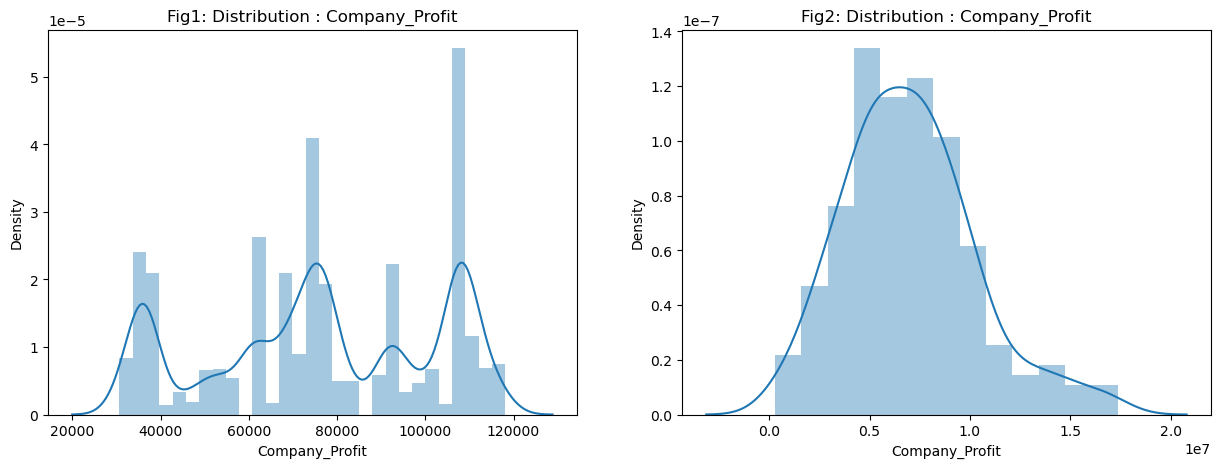

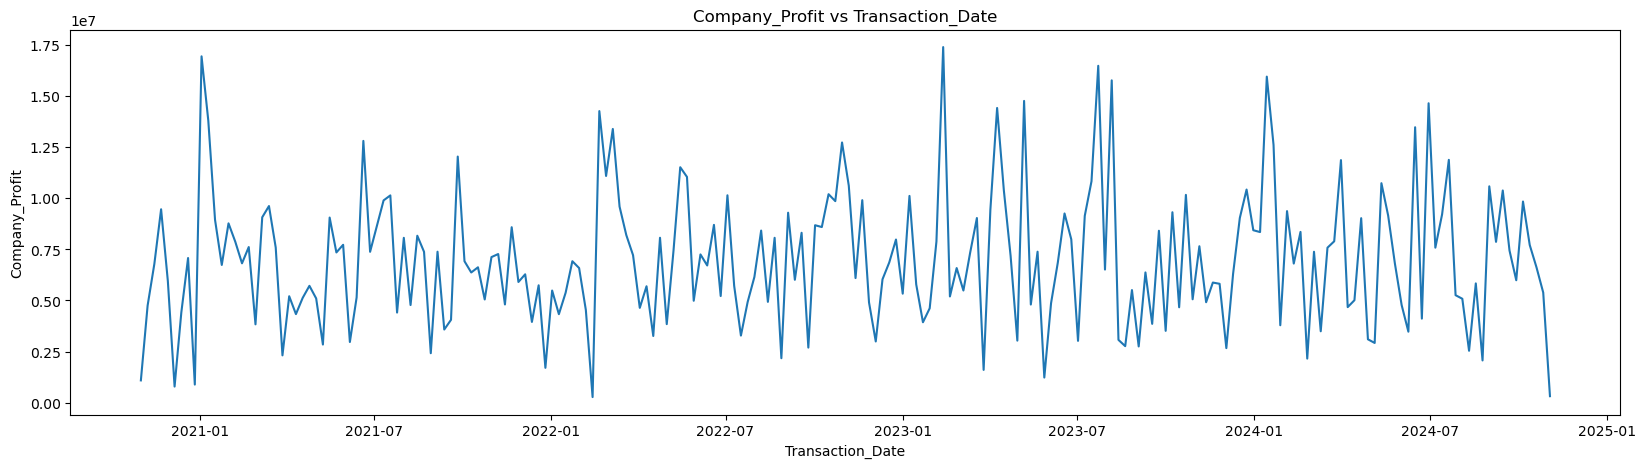

In [ ]:
color1 = ['#296C92','#3EB489']
fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
sns.distplot(data['Company_Profit']);
plt.title('Fig1: Distribution : Company_Profit')

plt.subplot(1,2,2)
sns.distplot(df1['Company_Profit']);
plt.title('Fig2: Distribution : Company_Profit')

fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (20,5))
plt.subplot(1,1,1)
sns.lineplot(x = df1.index ,y = 'Company_Profit',data = df1,palette = color1);
plt.title('Company_Profit vs Transaction_Date')

plt.show()
fig.tight_layout(pad = 2)

##KeyObservations:
#Fig1
#The multimodal distribution suggests that profits are concentrated in several distinct ranges.
#This indicates multiple contributing sources, possibly product segments, regions, or customer types driving profit variability.
#Fig2
#The unimodal, right-skewed distribution indicates that while the majority of profits fall within a moderate range, some high-value outliers exist.
#This could signify large, infrequent sales or premium products.
#Company_Profit vs Transaction_Date
#the time series shows fluctuations in profit with noticeable peaks and troughs, indicating possible seasonality or external factors influencing sales

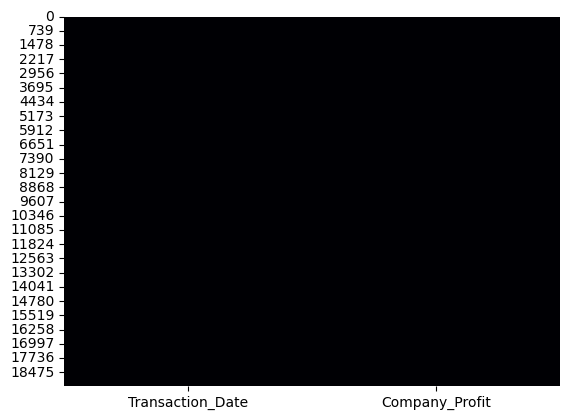

In [ ]:
data = data.dropna()
data

#Check missing datapoints
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

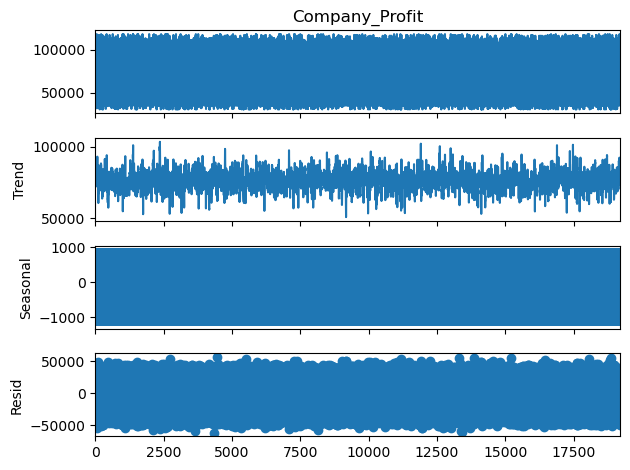

In [ ]:
decomposition = sm.tsa.seasonal_decompose(data['Company_Profit'],period = 12, model = 'additive').plot()
plt.show()

#Fig1: This variability suggests external factors, such as demand changes or seasonal influences, may impact profits.
#Fig2: Identifying key events or periods aligned with these trends can guide decision-making for long-term growth.
#Fig3: This suggests profits are not significantly influenced by regular seasonal patterns, and forecasting models may not need seasonal adjustments.
#Fig4: High residual variability suggests the presence of unforeseen factors not captured by the trend or seasonal patterns, warranting a closer examination.


In [ ]:
# Part 2 - Time Series Forecasting using pmdarima

# Fit Auto-ARIMA model
model = pm.auto_arima(data['Company_Profit'], seasonal=False, trace=True, suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=19.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=488267.095, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=458808.799, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=479676.309, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=452124.897, Time=0.64 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=450705.705, Time=0.53 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=1.00 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=12.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=16.18 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=13.96 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=443720.065, Time=2.42 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=443993.767, Time=1.63 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=443289.151, Time=3.06 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=442651.542, Time=3.86 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   

In [ ]:
# Forecast the next 10 weeks
n_weeks = 10
forecast_out, conf_int = model.predict(n_periods=n_weeks, return_conf_int=True)
forecast_index_out = pd.date_range(start=df1.index[-1] + pd.Timedelta(weeks=1), periods=n_weeks, freq='W')

# Print forecasted profits
forecast_df = pd.DataFrame({'Date': forecast_index_out, 'Forecasted_Profit': forecast_out})
print("Forecasted Company Profits for the Next 10 Weeks:")
print(forecast_df)

Forecasted Company Profits for the Next 10 Weeks:
            Date  Forecasted_Profit
19196 2024-11-10           79466.15
19197 2024-11-17           71399.45
19198 2024-11-24           81113.32
19199 2024-12-01           75536.93
19200 2024-12-08           81522.21
19201 2024-12-15           74099.65
19202 2024-12-22           78815.66
19203 2024-12-29           74689.97
19204 2025-01-05           78032.74
19205 2025-01-12           74865.40


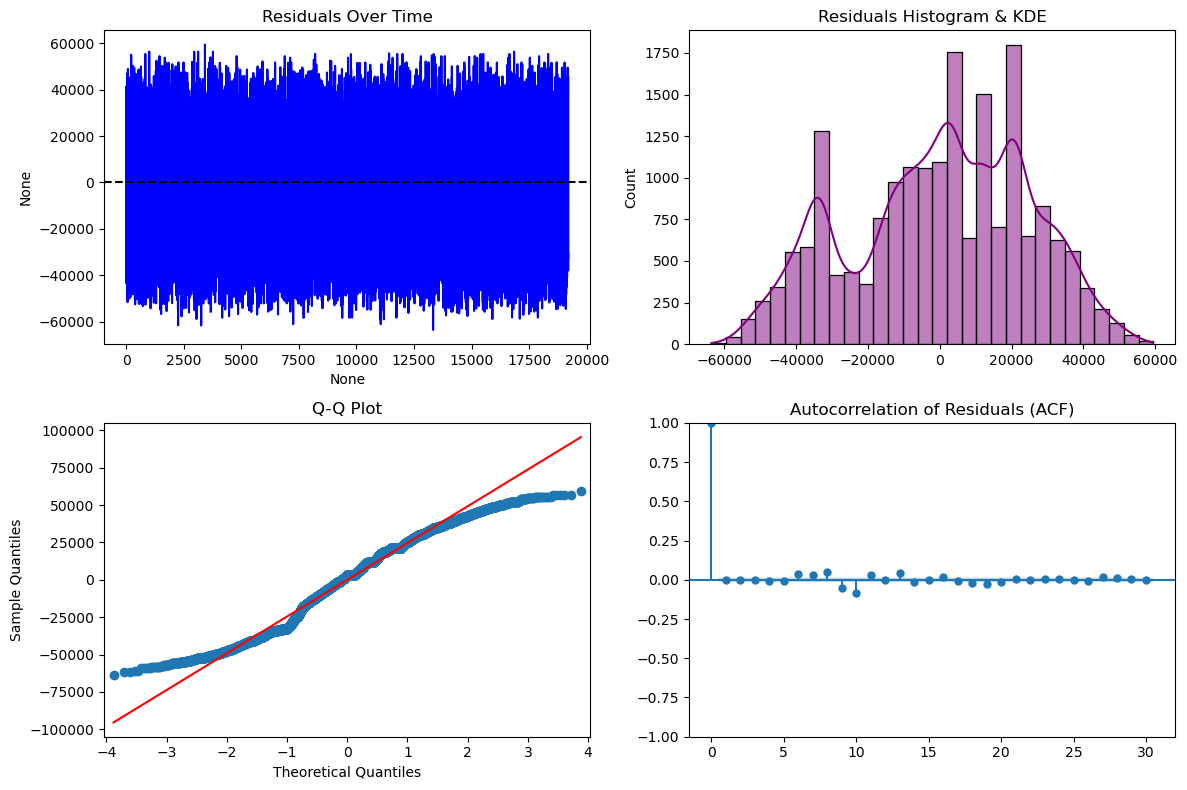

In [ ]:
# Get residuals
residuals = model.resid()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuals Over Time
sns.lineplot(x=data.index, y=residuals, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Residuals Over Time")
axes[0, 0].axhline(0, linestyle="--", color='black')

# Histogram & KDE of Residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[0, 1], color='purple')
axes[0, 1].set_title("Residuals Histogram & KDE")

# Q-Q Plot for Normality
sm.qqplot(residuals, line='s', ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot")

# Autocorrelation (ACF) Plot
sm.graphics.tsa.plot_acf(residuals, lags=30, ax=axes[1, 1])
axes[1, 1].set_title("Autocorrelation of Residuals (ACF)")

plt.tight_layout()
plt.show()

##KeyObservations
#Residuals
#The residuals in this graph display noticeable variability, with some extreme values.
#Large spikes might indicate outliers or missing influential variables.

#Residuals Histogram & KDE
#In this graph, while the residuals are roughly centered on zero, their shape suggests slight deviations from normality, with some outliers.

#QQ Plot
#The residuals deviate from the line at both extremes, indicating heavy tails (i.e., more extreme values than expected under normality)

#ACF
#This may point to seasonality, trends, or serial correlation not captured by the model.

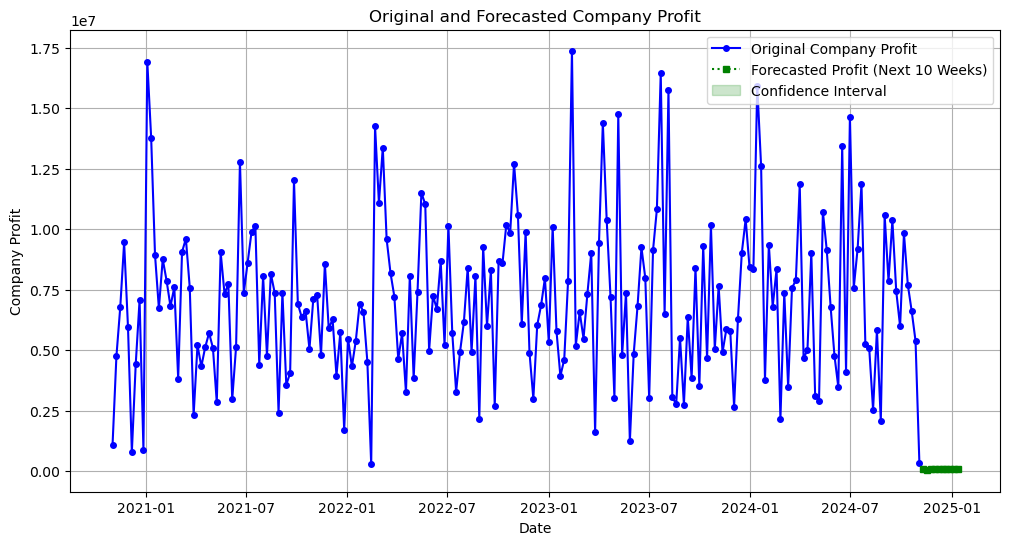

In [ ]:
# Plot original and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['Company_Profit'], label='Original Company Profit', color='blue', marker='o', markersize=4)
plt.plot(forecast_index_out, forecast_out, label='Forecasted Profit (Next 10 Weeks)', color='green', linestyle='dotted', marker='s', markersize=4)
plt.fill_between(forecast_index_out, conf_int[:, 0], conf_int[:, 1], color='green', alpha=0.2, label="Confidence Interval")
plt.xlabel('Date')
plt.ylabel('Company Profit')
plt.title('Original and Forecasted Company Profit')
plt.legend()
plt.grid(True)
plt.show()

#KeyObservations
#The forecast suggests a slight downward trend, signaling possible challenges ahead (market slowdowns, rising costs, or other external factors)
#The widening confidence interval at the end of the forecast highlights increasing uncertainty in future profits